In [1]:
#Instalaciones básicas
import pandas as pd
import numpy as np
import sys
sys.path.append("..")
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#Instalaciones de imputación de datos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


#Importaciones de soporte
from src import soporte as sp

# Porcentaje de nulos en cada columna

In [2]:
df_limpio = pd.read_csv("../data/data_anual.csv", parse_dates=['last_scraped'])

In [3]:
#Observamos número de nulos y porcentaje de ellos
numero_nulos_df_limpio, porcentaje_nulos_df_limpio = sp.calcular_nulos(df_limpio)

In [4]:
numero_nulos_df_limpio

id                                 0
review_scores_rating           13959
last_scraped                       0
neighbourhood_cleansed             0
property_type                      0
accommodates                       0
bathrooms                         85
bedrooms                         119
beds                             151
price                              0
minimum_nights                     0
number_of_reviews                  0
review_scores_accuracy         14000
review_scores_cleanliness      14004
review_scores_checkin          14004
review_scores_communication    14000
review_scores_location         14000
review_scores_value            14000
kitchen                            0
tv                                 0
air_conditioning                   0
pets_allowed                       0
dryer                              0
patio_or_balcony                   0
iron                               0
microwave                          0
cooking_basics                     0
s

In [5]:
porcentaje_nulos_df_limpio

id                              0.000000
review_scores_rating           16.863380
last_scraped                    0.000000
neighbourhood_cleansed          0.000000
property_type                   0.000000
accommodates                    0.000000
bathrooms                       0.102686
bedrooms                        0.143760
beds                            0.182418
price                           0.000000
minimum_nights                  0.000000
number_of_reviews               0.000000
review_scores_accuracy         16.912911
review_scores_cleanliness      16.917743
review_scores_checkin          16.917743
review_scores_communication    16.912911
review_scores_location         16.912911
review_scores_value            16.912911
kitchen                         0.000000
tv                              0.000000
air_conditioning                0.000000
pets_allowed                    0.000000
dryer                           0.000000
patio_or_balcony                0.000000
iron            

No tenemos nulos en las categoricas

In [6]:
#Observamos las medidas de dispersion de las columnas
df_limpio.describe().T

,count,mean,min,25%,50%,75%,max,std
id,82777.0,666701304760240000.0,21853.0,44999657.0,849084278670634112.0,1102844211069133568.0,1369179411176424192.0,497183060349330496.0
review_scores_rating,68818.0,4.654288,1.0,4.56,4.76,4.91,5.0,0.453037
last_scraped,82777,2024-10-22 13:58:37.977216,2024-06-15 00:00:00,2024-06-15 00:00:00,2024-09-11 00:00:00,2024-12-12 00:00:00,2025-03-12 00:00:00,NaN
accommodates,82777.0,3.251785,1.0,2.0,3.0,4.0,16.0,1.937366
bathrooms,82692.0,1.292447,0.0,1.0,1.0,1.5,15.0,0.64971
bedrooms,82658.0,1.388771,0.0,1.0,1.0,2.0,25.0,0.955042
beds,82626.0,1.926609,0.0,1.0,2.0,2.0,40.0,1.520144
price,82777.0,137.729406,1.0,63.0,99.0,147.0,23124.0,383.617038
minimum_nights,82777.0,7.245636,1.0,1.0,2.0,3.0,1100.0,20.334253
number_of_reviews,82777.0,53.760078,0.0,2.0,15.0,63.0,1136.0,93.376291


# Análisis de las columnas numéricas

id: identificador del anuncio

review_score_rating: gran concentración de los datos con reviews altas ya que por ejemplo el percentil 25% está en 4.56 y outliers hacia la izquierda

accommodates: Desviación típica alta (1,9) en relación a la media(3,3) por lo que existe una gran mayoría de anuncios ofertando entre 1 y 5 huespedes con outliers  hacia la derecha que llegan hasta los 16 

bathrooms: Observando que el percentil 75% está en 1.5 y la media en 1.29 concluímos que la gran mayoría de los anuncios van a ofertar un baño aunque con outliers principalmente hacia la derecha

bedrooms: Media de 1,38 y desviación de 0,9. Gran concentración de los datos entre los 0 y 2 baños pero con outliers hacia la derecha 

beds: Media de 1,9 y desviación de 1,5. Observamos un percentil 50 igual al 75 por lo existen gran cantidad de anuncios con 2 camas con outliers hacia la derecha.

price: Media de 133 con una desviacion de 340. Observamos una dispersión altísima con seguramente algún dato erroneo pues hay un mínimo de 1 y outliers hacia la derecha que llegan hasta los 23.124

minimum_nights: Media muy superior a la mediana incluso al percentil 75% por lo que deducimos que la gran mayoría de datos se sitúan entre 1 y 3 con outliers muy significativos a la derecha que desplazan bastante la media

number_of_reviews: Mediana muy superior a la media y una desviación también grande por lo que los valores están muy dispersos con especial importancia de los outliers por la derecha ya que el máximo de reseñas llega hasta las 1.136 reseñas

review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location,review_scores_value:  Percentiles 25, 50 y 75  bastante similares con desviación típica muy baja por lo que existen pocas notas muy bajas



In [7]:
#Generamos una lista de las columnas numericas
columnas_num = df_limpio.select_dtypes(include=np.number).columns.tolist()
columnas_num

['id',
 'review_scores_rating',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'price_person']

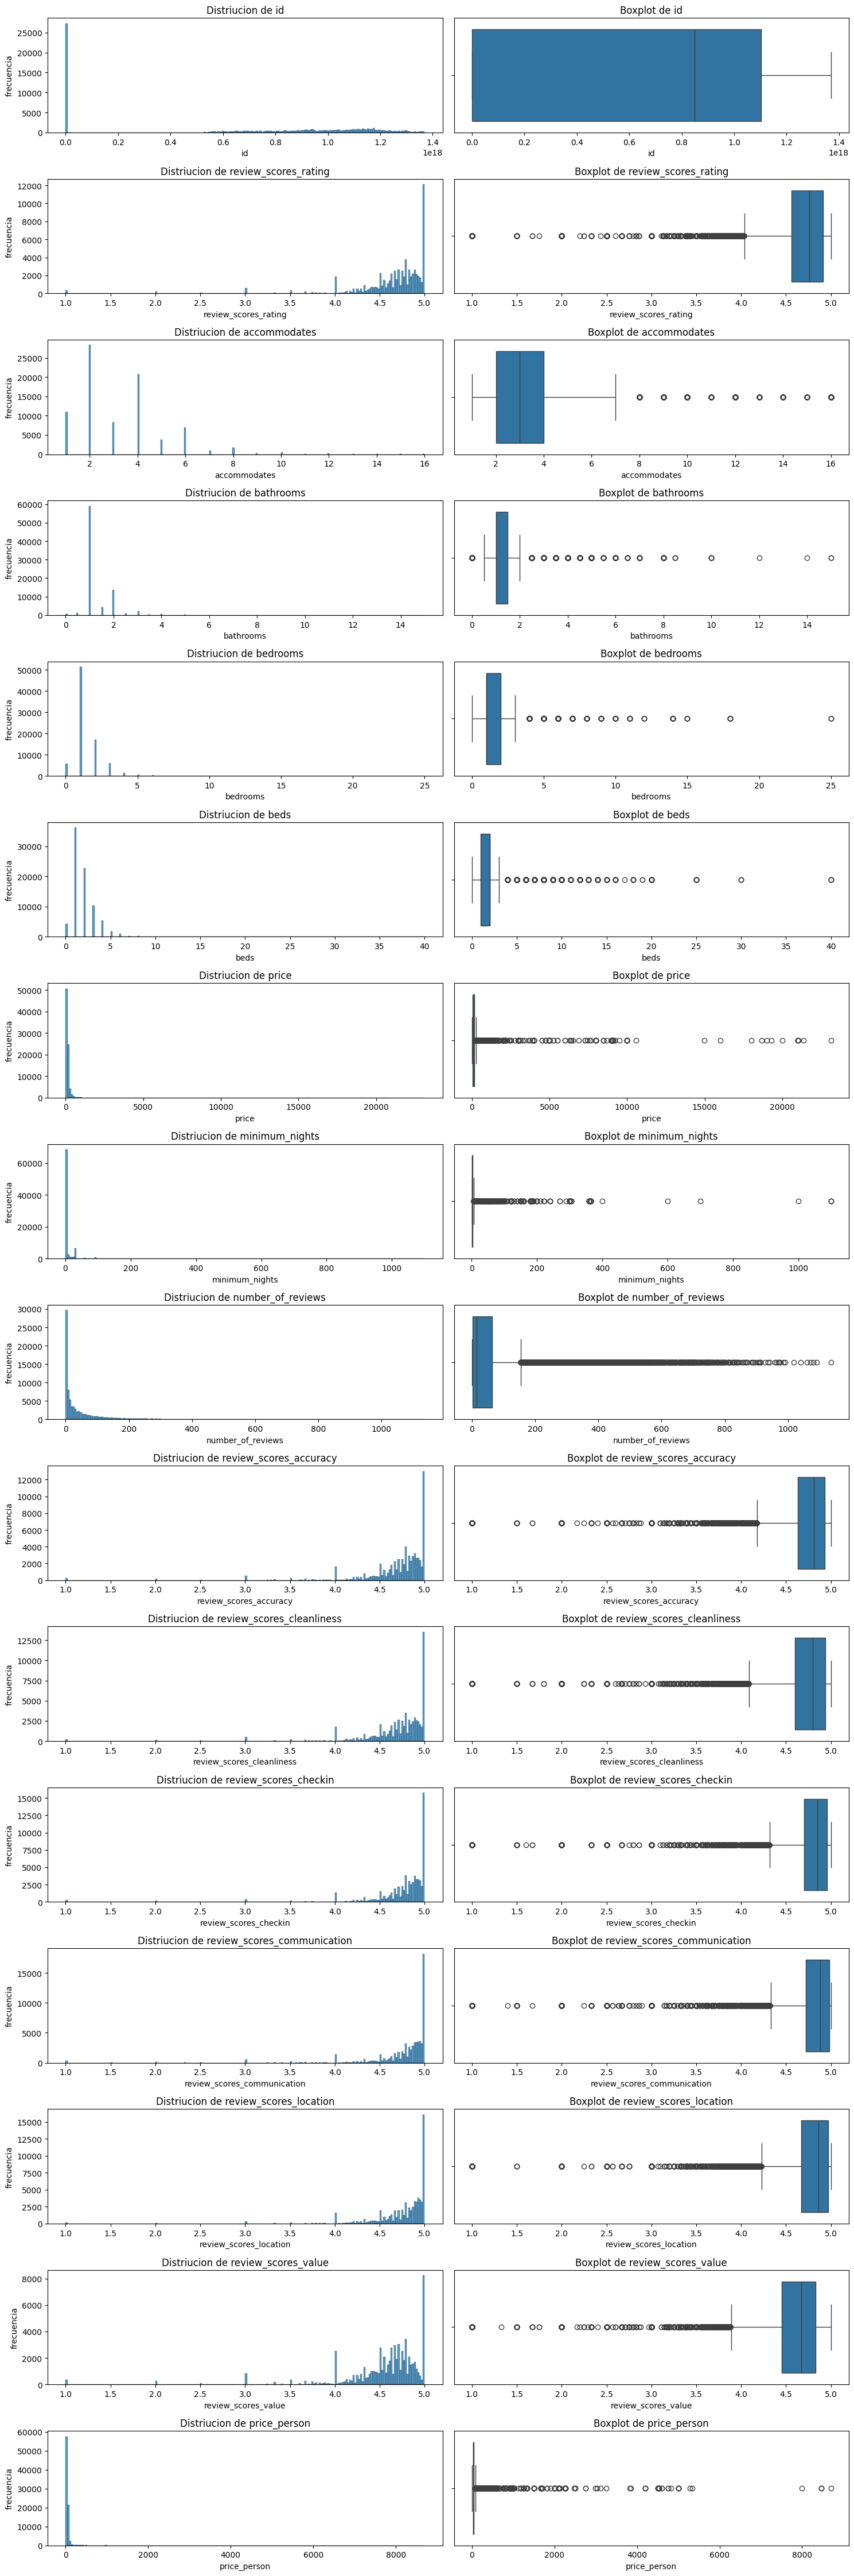

In [8]:
#Generamos subplots de las columnas numéricas
sp.subplot_col_num(df_limpio,columnas_num)

In [9]:
sp.print_outlier_limits(df_limpio,columnas_num)


Límites de outliers por variable:

- id:
   Límite inferior: -1654266316491201024.00
   Límite superior: 2757110527605334016.00

- review_scores_rating:
   Límite inferior: 4.03
   Límite superior: 5.44

- accommodates:
   Límite inferior: -1.00
   Límite superior: 7.00

- bathrooms:
   Límite inferior: 0.25
   Límite superior: 2.25

- bedrooms:
   Límite inferior: -0.50
   Límite superior: 3.50

- beds:
   Límite inferior: -0.50
   Límite superior: 3.50

- price:
   Límite inferior: -63.00
   Límite superior: 273.00

- minimum_nights:
   Límite inferior: -2.00
   Límite superior: 6.00

- number_of_reviews:
   Límite inferior: -89.50
   Límite superior: 154.50

- review_scores_accuracy:
   Límite inferior: 4.18
   Límite superior: 5.38

- review_scores_cleanliness:
   Límite inferior: 4.09
   Límite superior: 5.45

- review_scores_checkin:
   Límite inferior: 4.31
   Límite superior: 5.35

- review_scores_communication:
   Límite inferior: 4.33
   Límite superior: 5.37

- review_scores

In [10]:
#Generamos diccionario de outliers por la izquierda
dicc_outliers_izquierda = {'review_scores_rating': 4.03,
                'review_scores_accuracy':4.18,
                'review_scores_cleanliness': 4.10,
                'review_scores_checkin': 4.31,
                'review_scores_communication': 4.33,
                'review_scores_location':4.23,
                'review_scores_value':3.9}

In [11]:
#Generamos diccionario de outliers por la derecha
dicc_outliers_derecha = {
                'bathrooms':2.25,
                'bedrooms': 3.5,
                'beds': 3.5,
                'minimum_nights': 6,
                'number_of_reviews': 165.5,
                'price_person' : 80,
                'price': 273,
                'accommodates': 7}

In [12]:
# Analizamos ouliers por la izquierda
sp.outliers_izquierda(df_limpio,dicc_outliers_izquierda)

para la columna REVIEW_SCORES_RATING tenemos 4586, lo que representa un 5.5402%
para la columna REVIEW_SCORES_ACCURACY tenemos 4478, lo que representa un 5.4097%
para la columna REVIEW_SCORES_CLEANLINESS tenemos 4341, lo que representa un 5.2442%
para la columna REVIEW_SCORES_CHECKIN tenemos 4716, lo que representa un 5.6972%
para la columna REVIEW_SCORES_COMMUNICATION tenemos 4955, lo que representa un 5.986%
para la columna REVIEW_SCORES_LOCATION tenemos 4400, lo que representa un 5.3155%
para la columna REVIEW_SCORES_VALUE tenemos 3762, lo que representa un 4.5447%


In [13]:
# Analizamos ouliers por la derecha
sp.outliers_derecha(df_limpio,dicc_outliers_derecha)

para la columna BATHROOMS tenemos 4071, lo que representa un 4.918%
para la columna BEDROOMS tenemos 2280, lo que representa un 2.7544%
para la columna BEDS tenemos 9180, lo que representa un 11.09%
para la columna MINIMUM_NIGHTS tenemos 14300, lo que representa un 17.2753%
para la columna NUMBER_OF_REVIEWS tenemos 7628, lo que representa un 9.2151%
para la columna PRICE_PERSON tenemos 4586, lo que representa un 5.5402%
para la columna PRICE tenemos 5163, lo que representa un 6.2372%
para la columna ACCOMMODATES tenemos 2901, lo que representa un 3.5046%


In [14]:
#De la columna 'PRICE_PERSON' podemos eliminamos un precio irreal que fijaremos en 10€ y de bathroom cuando sea igual 0 pues es obligatrio que haya uno
df_limpio['price_person'] = df_limpio['price_person'].apply(lambda x: np.nan if x < 10 else x)
df_limpio['bathrooms'] = df_limpio['bathrooms'].apply(lambda x: np.nan if x == 0 else x)


# Gestión de nulos de las columnas genéricas

In [15]:
total_nulos, porcentaje_total_nulos = sp.calcular_nulos(df_limpio)

In [16]:
total_nulos

id                                 0
review_scores_rating           13959
last_scraped                       0
neighbourhood_cleansed             0
property_type                      0
accommodates                       0
bathrooms                        636
bedrooms                         119
beds                             151
price                              0
minimum_nights                     0
number_of_reviews                  0
review_scores_accuracy         14000
review_scores_cleanliness      14004
review_scores_checkin          14004
review_scores_communication    14000
review_scores_location         14000
review_scores_value            14000
kitchen                            0
tv                                 0
air_conditioning                   0
pets_allowed                       0
dryer                              0
patio_or_balcony                   0
iron                               0
microwave                          0
cooking_basics                     0
s

In [17]:
porcentaje_total_nulos

id                              0.000000
review_scores_rating           16.863380
last_scraped                    0.000000
neighbourhood_cleansed          0.000000
property_type                   0.000000
accommodates                    0.000000
bathrooms                       0.768329
bedrooms                        0.143760
beds                            0.182418
price                           0.000000
minimum_nights                  0.000000
number_of_reviews               0.000000
review_scores_accuracy         16.912911
review_scores_cleanliness      16.917743
review_scores_checkin          16.917743
review_scores_communication    16.912911
review_scores_location         16.912911
review_scores_value            16.912911
kitchen                         0.000000
tv                              0.000000
air_conditioning                0.000000
pets_allowed                    0.000000
dryer                           0.000000
patio_or_balcony                0.000000
iron            

In [18]:
#Distinguimos columnas con muchos nulos y pocos nulos en base a si tienen más o menos de un 10%
col_high_umbral, col_low_umbral = sp.calcular_solo_col_nul(df_limpio)

,Column,Datatype,NullCount,Null%
0,review_scores_rating,float64,13959,16.863380
1,bathrooms,float64,636,0.768329
2,bedrooms,float64,119,0.143760
3,beds,float64,151,0.182418
4,review_scores_accuracy,float64,14000,16.912911
5,review_scores_cleanliness,float64,14004,16.917743
6,review_scores_checkin,float64,14004,16.917743
7,review_scores_communication,float64,14000,16.912911
8,review_scores_location,float64,14000,16.912911
9,review_scores_value,float64,14000,16.912911


## Empezamos a gestionar nulos: columnas con % debajo del umbral.
- El umbral establecido es del 10%
- El metodo para imputar nulos va a ser el fillna()

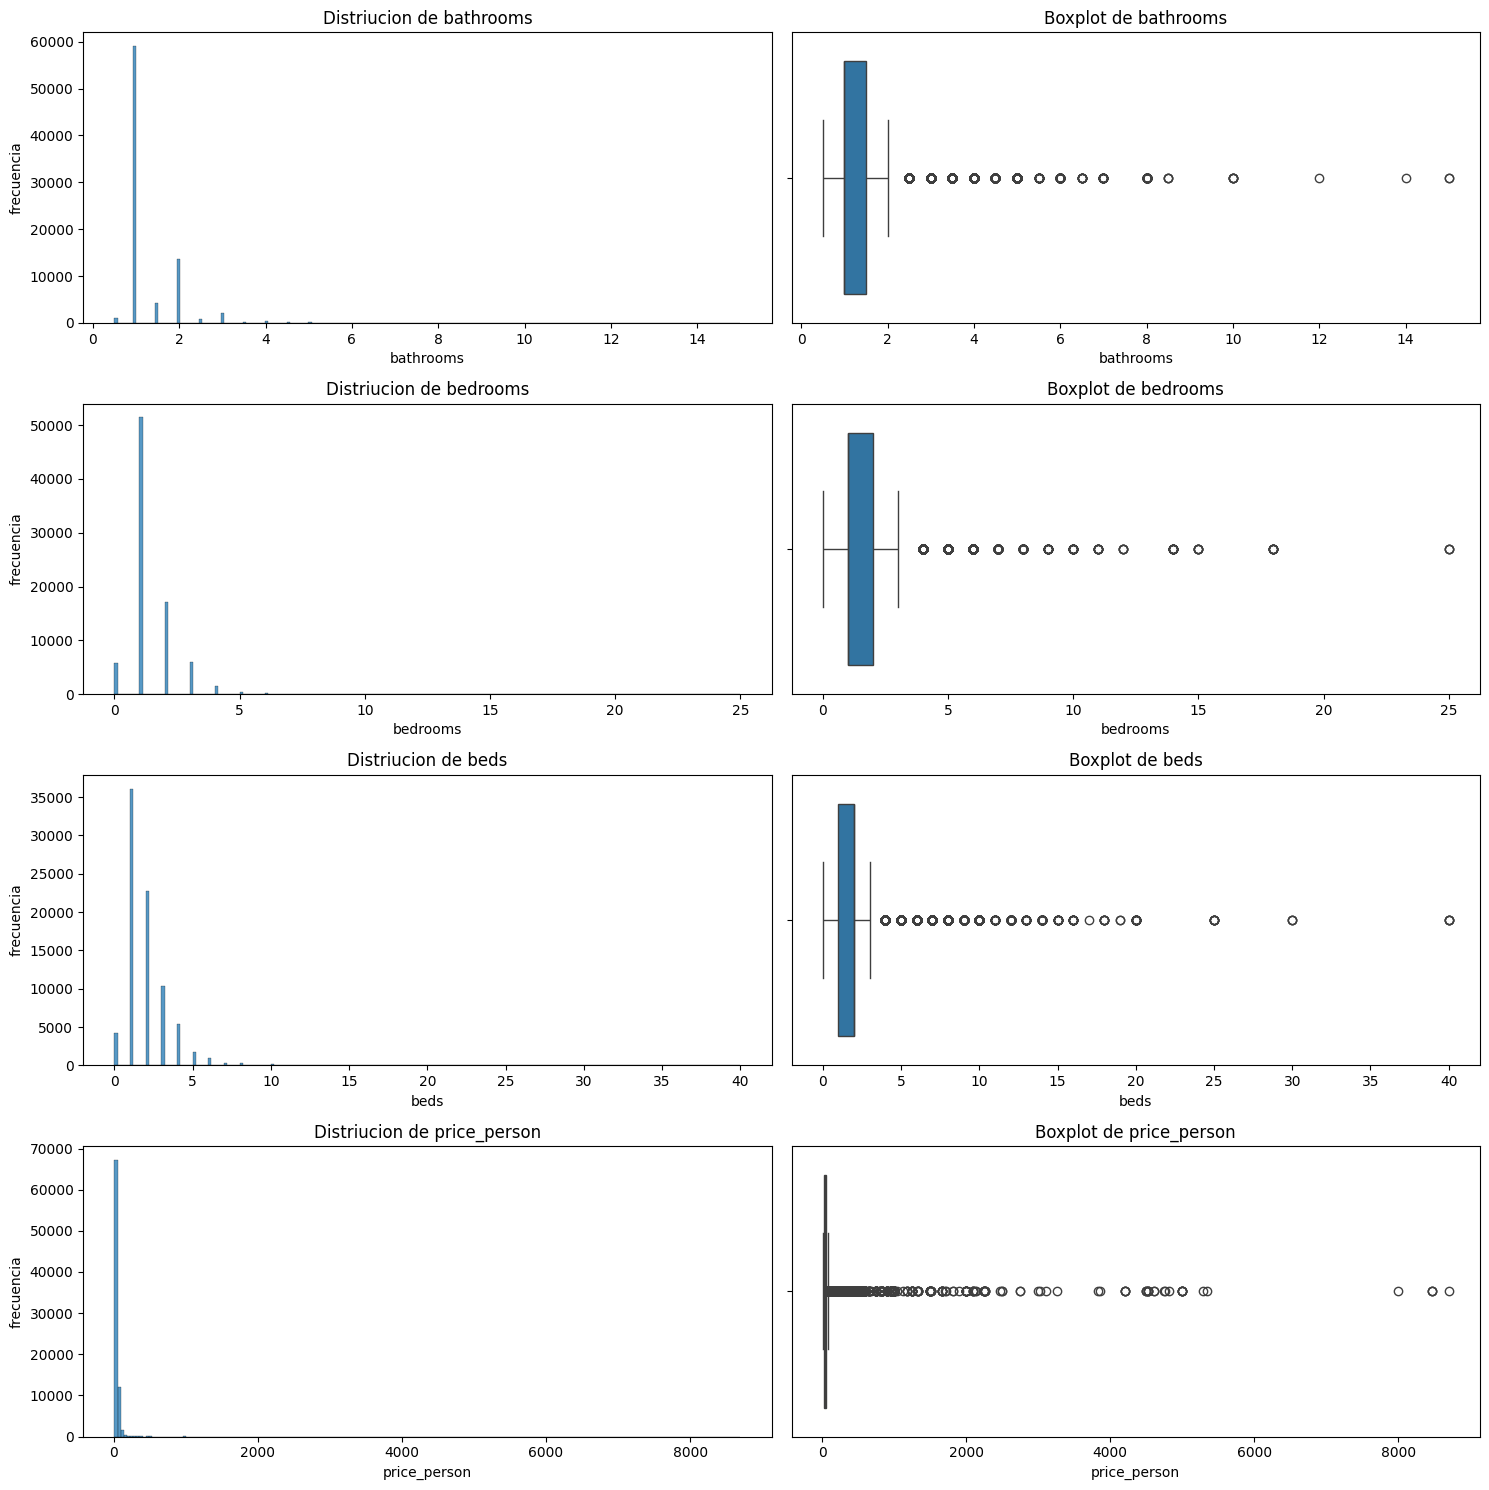

In [19]:
#Generamos subplots de las columnas con pocos nulos
sp.subplot_col_num(df_limpio, col_low_umbral)

In [20]:
df_limpio[col_low_umbral].describe().T

,count,mean,std,min,25%,50%,75%,max
bathrooms,82141.0,1.301116,0.643175,0.5,1.0,1.0,1.5,15.0
bedrooms,82658.0,1.388771,0.955042,0.0,1.0,1.0,2.0,25.0
beds,82626.0,1.926609,1.520144,0.0,1.0,2.0,2.0,40.0
price_person,82160.0,46.121777,128.338723,10.0,25.0,34.0,47.5,8698.0


In [21]:
#Rellenamos los nulos de 'bathrooms',  'bedrooms' y 'beds' con la mediana ya que los valores son muy próximos a la media y son valores lógicos en esas variables
#Price_person lo rellenamos con la media pues tenemos menos de 5% de outliers y puede ser aceotable

df_filled_simple = df_limpio.fillna({
    'bathrooms':df_limpio['bathrooms'].median(),
    'bedrooms':df_limpio['bedrooms'].median(),
    'beds':df_limpio['beds'].median(),
    'price_person':df_limpio['price_person'].mean()
})

In [22]:
#Comprobamos como cambian los estadisticos
#Describe del dataframe nuevo
df_filled_simple[col_low_umbral].describe().T

,count,mean,std,min,25%,50%,75%,max
bathrooms,82777.0,1.298803,0.641239,0.5,1.0,1.000000,1.500000,15.0
bedrooms,82777.0,1.388212,0.954469,0.0,1.0,1.000000,2.000000,25.0
beds,82777.0,1.926743,1.518760,0.0,1.0,2.000000,2.000000,40.0
price_person,82777.0,46.121777,127.859519,10.0,25.0,34.333333,47.333333,8698.0


Comprobamos cambios mínimos en los estadísticos. Procedemos a gestionar los nulos de nuestro df, con el que estamos trabajando, como hemos hecho en el df_filled_simple

## Empezamos a gestionar nulos: columnas con % superior al umbral.
- El umbral establecido es del 10%
- El metodo para imputar nulos va a ser interative imputer

In [23]:
df_limpio[col_high_umbral].describe().T

,count,mean,std,min,25%,50%,75%,max
review_scores_rating,68818.0,4.654288,0.453037,1.0,4.56,4.76,4.91,5.0
review_scores_accuracy,68777.0,4.703076,0.421231,1.0,4.63,4.81,4.93,5.0
review_scores_cleanliness,68773.0,4.689788,0.425293,1.0,4.60,4.80,4.94,5.0
review_scores_checkin,68773.0,4.748433,0.406974,1.0,4.70,4.85,4.96,5.0
review_scores_communication,68777.0,4.758038,0.432244,1.0,4.72,4.88,4.98,5.0
review_scores_location,68777.0,4.749738,0.364462,1.0,4.67,4.86,4.97,5.0
review_scores_value,68777.0,4.557459,0.483370,1.0,4.45,4.67,4.83,5.0


In [24]:
#Generamos datos con el metodo iterative imputer
iter_imputer = IterativeImputer(max_iter=50, random_state=42)
data_imputed = iter_imputer.fit_transform(df_limpio[col_high_umbral])
data_imputed

array([[4.58, 4.72, 4.56, ..., 4.82, 4.21, 4.67],
       [4.64, 4.78, 4.43, ..., 4.85, 4.97, 4.58],
       [4.68, 4.75, 4.75, ..., 4.9 , 4.95, 4.53],
       ...,
       [4.41, 4.51, 4.37, ..., 4.8 , 4.9 , 4.39],
       [5.  , 5.  , 4.  , ..., 5.  , 5.  , 5.  ],
       [4.59, 4.74, 4.7 , ..., 4.63, 4.72, 4.43]], shape=(82777, 7))

In [25]:
#Generamos datos con el metodo iterative imputer y oberservamos dataframe
df_limpio, col_iterative = sp.imputar_iterative(df_limpio, col_high_umbral)

,count,mean,std,min,25%,50%,75%,max
review_scores_rating_iterative,82777.0,4.654288,0.413076,1.0,4.610000,4.69,4.88,5.000000
review_scores_accuracy_iterative,82777.0,4.702985,0.384470,1.0,4.670000,4.75,4.91,5.000000
review_scores_cleanliness_iterative,82777.0,4.689721,0.388082,1.0,4.660000,4.73,4.91,5.000000
review_scores_checkin_iterative,82777.0,4.748373,0.371311,1.0,4.740000,4.80,4.94,5.000000
review_scores_communication_iterative,82777.0,4.757953,0.394444,1.0,4.757953,4.83,4.96,5.018266
review_scores_location_iterative,82777.0,4.749687,0.332402,1.0,4.720000,4.80,4.95,5.000000
review_scores_value_iterative,82777.0,4.557354,0.441205,1.0,4.500000,4.59,4.79,5.000000


In [26]:
#Despues de comprobar los estadísticos eliminamos las columnas con nulos.
df_limpio.drop(columns= col_high_umbral, inplace=True)


In [27]:
pd.set_option('display.max_columns', None)
df_limpio

,id,last_scraped,neighbourhood_cleansed,property_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,kitchen,tv,air_conditioning,pets_allowed,dryer,patio_or_balcony,iron,microwave,cooking_basics,self_check-in,washer,heating,hair_dryer,wifi,coffee_maker,elevator,pool,price_person,trimestre,review_scores_rating_iterative,review_scores_accuracy_iterative,review_scores_cleanliness_iterative,review_scores_checkin_iterative,review_scores_communication_iterative,review_scores_location_iterative,review_scores_value_iterative
0,21853,2025-03-11,cármenes,private room in rental unit,1,1.0,1.0,1.0,29,4,33,True,True,True,False,False,False,True,True,True,False,True,True,True,True,True,True,False,29.000000,2025Q1,4.58,4.72,4.56,4.75,4.82,4.21,4.67
1,62423,2025-03-12,justicia,private room in rental unit,4,1.5,1.0,2.0,77,1,227,True,False,False,True,True,False,True,False,True,False,True,True,True,False,False,False,False,19.250000,2025Q1,4.64,4.78,4.43,4.80,4.85,4.97,4.58
2,70059,2025-03-06,universidad,entire rental unit,2,1.0,1.0,1.0,66,15,61,True,True,False,False,False,False,True,True,True,False,True,True,True,True,True,True,False,33.000000,2025Q1,4.68,4.75,4.75,4.85,4.90,4.95,4.53
3,70310,2025-03-06,universidad,entire rental unit,2,1.0,1.0,2.0,89,30,29,True,False,False,False,False,False,True,True,True,False,False,True,True,True,True,False,False,44.500000,2025Q1,4.36,4.62,4.52,4.82,4.69,4.86,4.11
4,72150,2025-03-12,embajadores,entire rental unit,6,1.0,3.0,5.0,173,3,126,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,28.833333,2025Q1,4.61,4.62,4.40,4.86,4.85,4.85,4.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82772,1061409852021191841,2024-06-15,palacio,private room in rental unit,2,1.0,1.0,1.0,27,1,1,True,False,True,False,True,True,True,False,True,True,True,True,True,True,True,False,False,13.500000,2024Q2,5.00,5.00,5.00,5.00,5.00,5.00,5.00
82773,36095034,2024-06-15,palacio,private room in hostel,4,1.0,1.0,3.0,271,1,53,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,67.750000,2024Q2,4.62,4.57,4.64,4.89,4.66,4.98,4.58
82774,31983597,2024-06-15,embajadores,entire rental unit,8,2.0,3.0,5.0,311,3,153,True,False,False,False,False,False,True,True,True,False,False,False,True,True,True,True,False,38.875000,2024Q2,4.41,4.51,4.37,4.70,4.80,4.90,4.39
82775,1083323735523972892,2024-06-15,sol,entire rental unit,4,1.0,1.0,1.0,36,1,1,True,True,True,True,False,False,False,False,False,False,True,True,False,True,False,False,False,NaN,2024Q2,5.00,5.00,4.00,5.00,5.00,5.00,5.00


In [28]:
df_limpio.to_csv('../data/data_a_analizar.csv', index=False)